# Ejemplo de Red Completamente Conectada.
Este es un ejemplo de Red Completamente Conectada (MLP) con objetivo pronósticar la suma de dos enteros. Aunque este ejemplo es simple ilustra la creación de un modelo sobre los datos experimentales.

## Importar librerías

In [ ]:
from random import seed
import random
from random import randint

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import scipy.stats
from pylab import *

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers import Activation, ReLU
from tensorflow.python.keras import Sequential, Input, Model
from tensorflow import keras

In [ ]:
from sklearn.metrics import mean_squared_error

## Fijar semilla del generador de números aleatorios

In [ ]:
seed(1234)

## Generados dos listas de números aleatorios y sumarlos

In [ ]:
randomList1 = []
# Set a length of the list to 10
for i in range(0, 100):
    # any random numbers from 0 to 10
    randomList1.append(randint(0, 10))

print("Primera lista", randomList1)

Primera lista [2, 9, 6, 2, 7, 1, 8, 7, 1, 8, 3, 3, 3, 0, 2, 5, 8, 8, 2, 6, 3, 7, 1, 0, 2, 0, 8, 1, 4, 8, 2, 0, 3, 5, 9, 7, 3, 8, 9, 6, 7, 2, 5, 1, 3, 9, 2, 4, 2, 7, 6, 1, 6, 5, 2, 5, 6, 7, 4, 7, 3, 3, 4, 9, 7, 1, 8, 5, 3, 2, 2, 8, 7, 8, 8, 3, 1, 2, 7, 8, 2, 8, 1, 5, 1, 1, 1, 8, 9, 2, 5, 0, 9, 2, 4, 4, 4, 3, 5, 3]


In [ ]:
randomList2 = []
# Set a length of the list to 10
for i in range(0, 100):
    # any random numbers from 0 to 10
    randomList2.append(randint(0, 10))

print("Printing list of 10 random numbers")
print("Segunda lista",randomList2)

Printing list of 10 random numbers
Segunda lista [9, 9, 1, 2, 1, 2, 8, 1, 9, 7, 5, 3, 1, 3, 5, 2, 4, 1, 1, 9, 9, 0, 4, 4, 3, 6, 3, 9, 5, 9, 6, 9, 4, 6, 0, 2, 8, 4, 1, 6, 7, 6, 1, 7, 8, 4, 9, 4, 3, 4, 6, 5, 1, 4, 7, 3, 6, 6, 9, 7, 9, 2, 8, 0, 8, 7, 2, 6, 9, 8, 3, 1, 7, 4, 7, 8, 3, 5, 5, 9, 4, 7, 8, 7, 7, 5, 3, 8, 8, 5, 8, 5, 2, 2, 1, 0, 6, 9, 7, 9]


In [ ]:
randomSum=np.add(randomList1,randomList2)
print(randomSum)

[11 18  7  4  8  3 16  8 10 15  8  6  4  3  7  7 12  9  3 15 12  7  5  4
  5  6 11 10  9 17  8  9  7 11  9  9 11 12 10 12 14  8  6  8 11 13 11  8
  5 11 12  6  7  9  9  8 12 13 13 14 12  5 12  9 15  8 10 11 12 10  5  9
 14 12 15 11  4  7 12 17  6 15  9 12  8  6  4 16 17  7 13  5 11  4  5  4
 10 12 12 12]


Se construye un dataframe con las anteriores listas distribuidas en forma de columnas.

In [ ]:
df2=np.column_stack((randomList1, randomList2, randomSum))
print(df2.shape)
dfnew=pd.DataFrame(data=df2)
print(dfnew.shape)

(100, 3)
(100, 3)


Se pone nombre a las columnas.

In [ ]:
print(dfnew.columns)
dfnew.columns = ["V1","V2","Output"]
print(dfnew.columns)

RangeIndex(start=0, stop=3, step=1)
Index(['V1', 'V2', 'Output'], dtype='object')


Se borran estructuras de datos innecesarias.

In [ ]:
del(df2)

In [ ]:
print(dfnew)

    V1  V2  Output
0    2   9      11
1    9   9      18
2    6   1       7
3    2   2       4
4    7   1       8
..  ..  ..     ...
95   4   0       4
96   4   6      10
97   3   9      12
98   5   7      12
99   3   9      12

[100 rows x 3 columns]


Se eliminan las variables no necesarias.

In [ ]:
del(randomList1,randomList2,randomSum)

A partir del dataframe, se separan las variables independientes (X) y las dependientes (Y).

In [ ]:
X = dfnew.iloc[:,0:2]
print(X.shape)

(100, 2)


In [ ]:
Y = dfnew.iloc[:,2]
print(Y.shape)

(100,)


## Separación de los conjuntos de entrenamiento y test.
Se verifica la dimensionalidad de la entrada y la salida.

In [ ]:
assert X.shape[0] == Y.shape[0]

Se establece que el conjunto de test sea el 30% de los datos.

In [ ]:
test_size = int(np.floor(0.30*X.shape[0]) )
print(test_size)

30


In [ ]:
 X = np.asarray(X)# convertirnos los datos de DataFrame a Numpy Arrays
 Y = np.asarray(Y)# para que sean leidos por los modulos de Keras

Se dividen los arrays de las variables independientes y dependientes.



In [ ]:
trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = Y[:-test_size], Y[-test_size:]
print(trainX.shape,testX.shape)
print(len(trainY),len(testY))

(70, 2) (30, 2)
70 30


In [ ]:
 trainX_num=trainX.shape[1]
 print(trainX_num)

2


## Definición de la Red Neuronal



In [ ]:
dropout_par=0.10

In [ ]:
model = keras.Sequential() # creamos el modelo secuencial

# Ponemos una primera capa oculta
model.add(Dense(8, activation='relu', input_shape=(2,))) 
print(model.layers[-1].output_shape)
# Segunda capa
model.add(Dense(5, activation='relu')) 
print(model.layers[-1].output_shape)
# Incorporamos la capa de salida
model.add(Dense( 1, activation='linear'))

(None, 8)
(None, 5)


Se muestra un resumen de la red creada.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


Se compila el modelo, incluyendo la elección del optimizador y del error que se minimizará durante el entrenamiento. A continuación se entrena el modelo, almacenando la información del error en la variable "history". 

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
history=model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 86ms/step - loss: 83.5368 - mse: 83.5368 - val_loss: 100.3649 - val_mse: 100.3649
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 81.0289 - mse: 81.0289 - val_loss: 98.2616 - val_mse: 98.2616
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 80.2577 - mse: 80.2577 - val_loss: 96.1547 - val_mse: 96.1547
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 80.9038 - mse: 80.9038 - val_loss: 94.0737 - val_mse: 94.0737
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 77.0706 - mse: 77.0706 - val_loss: 92.0473 - val_mse: 92.0473
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 74.9322 - mse: 74.9322 - val_loss: 90.1085 - val_mse: 90.1085
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 73.5513 - mse: 73.5513 - val_loss: 88.1128 - val_mse: 88.1128
Epoch 8/100
3/3 [==============================] - 0s 26ms/s

De forma ilustrativa se puede contar el número de parámetros entrenables del modelo.

In [ ]:
from keras.utils.layer_utils import count_params

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)
print(trainable_count,non_trainable_count)

75 0


El modelo entrenado puede ser salvado. Esto es especialmente útil para modelos que requieren mucho tiempo de entrenamiento. Una vez salvado el modelo entrenado, este puede ser recuperado para hacer nuevos pronósiticos.

In [ ]:
#model.save('modelo_entrenado.h5')

Se pronostican los resultados para el conjunto de test.


In [ ]:
pred = model.predict(testX)

Se calcula el error cuadrático medio del pronóstico.


In [ ]:
testScoreECM = mean_squared_error(testY, pred)
print('ECM: %.4f' % (testScoreECM))

ECM: 4.1949


## Visualización de resultados

En la siguiente gráfica se visualiza la evolución del error para el conjunto de entrenamiento y test en función de las épocas.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


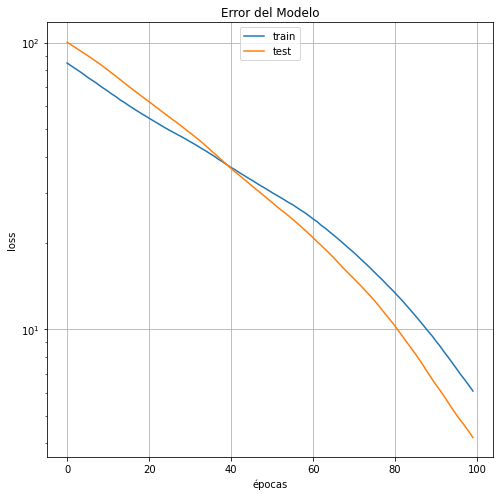

In [ ]:
plt.figure(1, figsize=(8,8))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.yscale("log")
plt.title('Error del Modelo')
plt.ylabel('loss')
plt.xlabel('épocas')
plt.grid()
#plt.xlim(-0.5,20.1)
plt.legend(['train', 'test'], loc='upper center')

from google.colab import files
plt.savefig('loss_MLP.eps')
#files.download('loss_MLP.eps') # Descomentar para descargar localmente

Se verifica la calidad del pronóstico. Se muestran las variables de entrada, el resultado, el pronóstico y el error ($\hat{y}-y$).

In [ ]:
print('V1','V2','\t\t','Real','\t','Pronóstico','\t','Error')
error = np.zeros(len(pred))
for i in range(len(testY)):
  error[i]=testY[i]-pred[i]
  print(i, testX[i],'\t',testY[i],'\t',pred[i],'\t',error[i])

V1 V2 		 Real 	 Pronóstico 	 Error
0 [2 3] 	 5 	 [4.8901772] 	 0.10982275009155273
1 [8 1] 	 9 	 [13.236711] 	 -4.236710548400879
2 [7 7] 	 14 	 [12.747765] 	 1.2522354125976562
3 [8 4] 	 12 	 [12.83922] 	 -0.8392200469970703
4 [8 7] 	 15 	 [14.015036] 	 0.9849643707275391
5 [3 8] 	 11 	 [8.058986] 	 2.941014289855957
6 [1 3] 	 4 	 [3.6229057] 	 0.3770942687988281
7 [2 5] 	 7 	 [5.650792] 	 1.349207878112793
8 [7 5] 	 12 	 [11.987149] 	 0.012850761413574219
9 [8 9] 	 17 	 [14.775651] 	 2.224349021911621
10 [2 4] 	 6 	 [5.270485] 	 0.7295150756835938
11 [8 7] 	 15 	 [14.015036] 	 0.9849643707275391
12 [1 8] 	 9 	 [6.4432] 	 2.55679988861084
13 [5 7] 	 12 	 [10.213222] 	 1.786778450012207
14 [1 7] 	 8 	 [5.8570385] 	 2.1429615020751953
15 [1 5] 	 6 	 [4.684714] 	 1.3152861595153809
16 [1 3] 	 4 	 [3.6229057] 	 0.3770942687988281
17 [8 8] 	 16 	 [14.395343] 	 1.6046571731567383
18 [9 8] 	 17 	 [15.662614] 	 1.337386131286621
19 [2 5] 	 7 	 [5.650792] 	 1.349207878112793
20 [5 8] 	 13 	 [1

Es importante verificar hasta donde sea posible la distribución de errores. En la siguiente gráfica se muestra el pronóstico contra los datos reales.

Text(0.5, 0, 'Real')

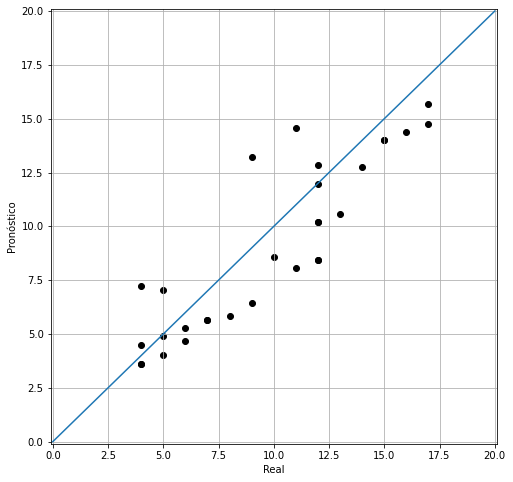

In [ ]:
plt.figure(1, figsize=(8,8))

plt.scatter(testY, pred, color="black")
plt.grid()
plt.xlim(-0.1,20.1)
plt.ylim(-0.1,20.1)

plt.plot([0,20],[0,20])
plt.ylabel('Pronóstico')
plt.xlabel('Real')

#from google.colab import files
#plt.savefig('filename')
#files.download('filename') # Descomentar para descargar localmente

Se general el histograma de los residuos (errores), $y-\hat{y}$. Estos deberían tener un comportamiento gaussiano con media nula.

(array([0.08549839, 0.08549839, 0.08549839, 0.        , 0.        ,
        0.08549839, 0.        , 0.        , 0.08549839, 0.08549839,
        0.08549839, 0.25649517, 0.08549839, 0.25649517, 0.59848874,
        0.17099678, 0.17099678, 0.17099678, 0.08549839, 0.17099678]),
 array([-4.23671055, -3.84683967, -3.45696878, -3.0670979 , -2.67722702,
        -2.28735614, -1.89748526, -1.50761437, -1.11774349, -0.72787261,
        -0.33800173,  0.05186915,  0.44174004,  0.83161092,  1.2214818 ,
         1.61135268,  2.00122356,  2.39109445,  2.78096533,  3.17083621,
         3.56070709]),
 <a list of 20 Patch objects>)

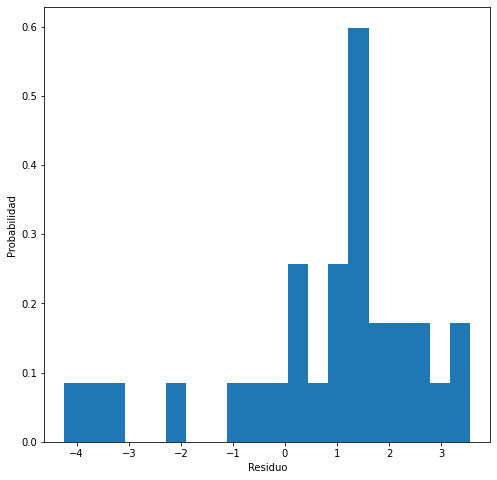

In [ ]:
plt.figure(1, figsize=(8,8))
plt.ylabel('Probabilidad')
plt.xlabel('Residuo')
plt.hist(error, density=True, bins=20)

#from google.colab import files
#plt.savefig('filename')
#files.download('filename') # Descomentar para descargar localmente

## Limpiando la sesión.
Esto hará que cada nueva ejecución de la red sea un reentrenamiento. No un entrenamiento nuevo.

In [ ]:
  tf.keras.backend.clear_session()

## Propuestas adicionales.

*   Modificar el número de neuronas y capas para mejorar el rendimiento de la red. 
*   Hacer un regresor multivariante en la salida que pronostique la suma y el producto de las dos variables de entrada.
*   Modificar la red añadiendo dropout.

